# 380CT Assignment - Vox Machina

## featuring Nathan Brown, Harry Wills,  Ammar Bharmal, & Daniyal Khan

# Theory

The Travelling Salesman Problem(TSP) is a NP-Hard problem that, given that the graph is a complete with set V vertices, find the shortest Hamiltonian cycle in terms of distance. (Grefenstette, et al, 1985). 

This can be given by:
$$d(\pi)=\sum_{i=1}^{|\pi|-1} d(v_{i},v_{i+1})$$
Where $\pi = (v_{1},v_{2}, ...)$ (Panigrahi 2015)

Due to the nature of the TSP, the more nodes/cities there are for the salesman to traverse, the computational time increases exponentially, and becomes practically impossible after even a small number of nodes.  To combat this, metaheuristic algorithms have been developed.  These algorithms aim to provide a much faster solution whilst sacrificing some amount of accuracy for the sake of solving the problem.

## Exhaustive Search

### Definition

Exhaustive Search is not a meta-heuristic algorithm, as it will return the most accurate path available with no guessing.  It achieves this by travelling along all possible paths available and determing the shortest cycle that way.  However due to this, the execution time is incredibly slow with a large amount of data.  Therefore, this algorithm will only be used for determining the accuracy of the meta-heuristic algorithms compared to an algorithm that checks all paths.

### Pseudocode 

***
**Algorithm:** Exhaustive Search <br>
**Input:** A complete weighted graph $G = (V,E)$ where $V = 1,...,n$ for some $n\geq1$ and a weight function $w(a,b($ which gives the weight of edge $(a,b)$<br>
**Output:** The shortest Hamiltonian cycle path, the time taken in terms of distance, and how accurate the estimate is to the minimal cycle length
***
1. $backtrack(sol, depth)$
2. $\quad if (is_solution(sol))$
3. $\quad \quad return\, sol$
4. $\quad else$
5. $\quad \quad solgenerated = generatesolution()$
6. $\quad \quad backtrack(solgenerated,depth+1)$

(Ve4cib, 2006)

## Big O Analysis

As shown in the pseudocode, the code runs at least n times, but due to recursive nature, the time complexity increases more rapidly,and can be represented as the following Big O:  
$$O(n*(n-1))\quad Simplified \, to$$ 
$$O(n!)\quad Factorial$$

## Ant Colony Optimizaton

### Definition

The first meta-heuristic algorithm that will be implemented to the TSP is 'Ant Colony Optimization'(ACO).  This algorithm is designed on the behaviour of ants searching by food, which is done by randomly searching until finding optimal paths, leaving pheramones behind for their colony (Makura, Wiktor, n.d.).  Due to this, the most optimal path isn't deduced, but more-so stumbled upon by chance, and is therfore probability-based deduced from ant $k$ visiting city $j$ from city $i$.  This can be mathematically shown as:
$$
p^{k}_{ij} =
\begin{cases}
    \frac{[\tau_{ij}]^{\alpha}\cdot [\eta_{ij}]^{\beta}}
    {\sum_{s\in allowed_k}[\tau_{is}]^{\alpha}\cdot [\eta_{is}]^\beta}, & \text j \in allowed_k \\
    0, & \text{otherwise}
\end{cases} \quad Eq(1)
$$
* Where $\tau_{ij}$ is the intensity of the pheramona trail between cities $i$ and $j$.
* $\alpha$ is the regulator for the influence of $\tau_{ij}$.
* $\eta_{ij}$ is the visibility of city j fromcity i, which is always the distance between the two cities.
* $\beta$ is the regulator for the influence of $\eta_{ij}$.
* $allowed_k$ is the set of cities that have not yet been visited.

The following equations are then required for the updating rule of $\tau_{ij}$:

$$\tau_{ij}(t+1) = \rho\cdot\tau_{ij}(t)+\Delta\tau_{ij}\quad \quad Eq(2)$$

$$\Delta\tau_{ij} = \sum_{k=1}^l \Delta\tau_{ij}^k \quad \quad Eq(3)$$

$$
\Delta\tau_{ij}^k =
\begin{cases}
    Q/L_k, & \text{if ant k travels on edge (i,j)}\\
    0, & \text{otherwise}
\end{cases} \quad Eq(4)
$$
* Where $Q$ is a constant that represents the base strength of pheramone levels.
* $L_k$ is the length of the travel (weight of edge).

(Yang, et al. 2008)

### Pseudocode

***
**Algorithm:** Ant Colony Optimization<br>
**Input:** A complete weighted graph $G = (V,E)$ where $V = 1,...,n$ for some $n\geq1$ and a weight function $w(a,b($ which gives the weight of edge $(a,b)$<br>
**Output:** The shortest Hamiltonian cycle path, the time taken in terms of distance, and how accurate the estimate is to the minimal cycle length
***
1. $For\, t\leftarrow1 \,to\, iteration\, number \,$
2. $\quad For\, k \leftarrow1 \, to\, l$
3. $\quad \quad While(\neg ant_kCompletedTour)$
4. $\quad \quad \quad Select \, city \, j \, to\, be\, visited\, next\, with\, probability\, p_{ij}\, given\, by\, Eq. (1)$
5. $\quad \quad Calculate \, L_k$
6. $\quad Update\, the\, trail\, levels\, according\, to\, Eqs.(2-4)$

(Yang, et al. 2008)

### Big O Analysis

Due to the nature of the nested looping of this algorithm, and there being three nested loops,the time complexity can be represented as the following Big O:
$$O(n*n*n)\quad Simplified \, to$$
$$O(n^3) \quad Cubic$$


ACO requires $N$ memory for the variable $L_k$ and for the Graph data, for representing sets, and a fixed value for variables $t$, $k$, $l$, and selected cities.  The space complexity for this can be represented as the following Big O:
$$O(n+n+n) \quad Simplified \, to$$
$$O(n) \quad linear$$

## Tabu Search

### Definition

The second meta-heuristic algorithm that will be implemented to the TSP is 'Tabu Search'.  This algorithm consists of using an iterative solution implementation a set of problem solutions and moving from one solution to another in the same neighbourhood of each related solution.  This means maintaining a short term memory of of specific changes of recent moves within the search space and preventing future moves from undoing those changes (Panigrahi, 2015).  

### Pseudocode

***
**Algorithm:** Tabu Search <br>
**Input:** A complete weight graph $G=(V,E)$ where $V={1,...,n}$ for some $n\geq1$ and a weight function $w(a,b)$ which gives the weight of edge $(a,b)$<br>
**Output:** The shortest Hamiltonian cycle path, the time taken in terms of distance, and how accurate the estimate is to the minimal cycle length
***
1. $S_{best} \leftarrow ConstructInitialSolution()$
2. $TabuList \leftarrow \emptyset$
3. $While(\neg StopCondition())$
4. $\quad CandidateList \leftarrow \emptyset$
5. $\quad for(S_{candidate} \in S_{bestneighbourhood}$
6. $\quad \quad if(\neg ContainsAnyEdges(S_{candidate}, TabuLate)$
7. $\quad \quad \quad CandidateList \leftarrow S_{candidate}$ 
8. $\quad \quad end\, if$
9. $\quad end\, for$
10. $\quad S_{candidate} \leftarrow LocateBestCandidate(CandidateList)$
11. $\quad if(Cost(S_{candidate)}\leq Cost(S_{best}))$
12. $\quad \quad S_{best} \leftarrow S_{candidate}$
13. $\quad \quad TabuList \leftarrow FeatureDifferences(S_{candidate},S_{best})$
14. $\quad \quad While(TabuList > TabuList_{size})$
15. $\quad \quad \quad DeleteFeature(TabuList)$
16. $\quad \quad end\, While$
17. $\quad end\, if$
18. $end\, While$
19. $Return\, S_{best}$

(Brownlee 2015)

### Big O Analysis

Due to the nested looping occuring within the outer loop starting at line 3 to line 18, combined with lines 5-9, and 14-16, the time complexity in Big O notation would be:
$$O(n*n*n)  \quad Simplified\,to$$
$$O(n^3)\quad Cubic$$

Tabu search requires $N$ memory for the $TabuList$, $S_{bestneighbourhood}$, $S_{best}$ and $CandidateList$ variables, as well as fixed memory for iterable variables, resulting in the following space complexity:
$$O(n+n+n+n)\quad Simplified \,to$$
$$O(n) \quad Linear$$

# Practice

## Generate Complete, Weighted Graph Code (taken from: https://gist.github.com/RobertTalbert/9f0879e5ed4b4297fc5f) and adapted to python3 and up to date networkx library

In [6]:
import networkx as graphs
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class CompleteWGraph:
    n = 0
    p = 0
    lower_weight = 0
    upper_weight = 0
    distmatrix = {}
    w_edges = []
    def __init__(self,n,p,lower_weight,upper_weight):
        """n: number of nodes
        p: prob of 2 nodes being connected (between 0-1)
        lower/upper weight: range of possible weight values"""
        self.n = n
        self.p = p
        self.lower_weight= lower_weight
        self.upper_weight = upper_weight
        
    def random_weighted_graph(self): 
        g = graphs.gnp_random_graph(self.n,self.p)
        m = g.number_of_edges()
        weights = [random.randint(self.lower_weight, self.upper_weight) for r in range(m)]
        #unweighted connections
        uw_edges = g.edges()
    
        # Create weighted graph edge list 
        i=0
        w_edges = []
        ret_graph = graphs.Graph()
        for edge in uw_edges:
            #w_edges = [uw_edges[i][0], uw_edges[i][1], weights[i]]
            #w_edges+={(edge[0],edge[1]):weights[i]}
            ret_graph.add_edge(edge[0],edge[1],weight=weights[i])
            i =i +1
        #print(w_edges)
        #return graphs.Graph(w_edges, weighted = True,s=weights)
        return ret_graph
        
    


    def createDistanceMatrix(self,graph):
        self.distmatrix = pd.DataFrame(columns=list(
            graph.nodes), index=list(graph.nodes))
        listcities = list(graph.nodes)
        #print(listcities)
        for i in range(self.n):
            if i not in graph.nodes:
                continue
            for j in range(self.n):
                if j not in graph.nodes:
                    continue
                if i == j:
                    self.distmatrix.iloc[i, j] = np.inf
                else:
                    #weight = graph.get_edge_data(i,j)['weight']
                    if (graph.get_edge_data(i,j) is not None):
                        self.distmatrix.iloc[i, j] = graph.get_edge_data(i,j)['weight']
                    else:
                        self.distmatrix.iloc[i,j] = 0
                        self.distmatrix.iloc[j, i] = self.distmatrix.iloc[i, j]


In [28]:
g1_data = CompleteWGraph(10,0.6,10,30)
g1 = g1_data.random_weighted_graph()

#weightdict = g1.get_edge_data(0,2)
#print(weightdict)
#print(g1.get_edge_data(0,2)['weight'])

g1_data.createDistanceMatrix(g1)
print("g1 distance matrix")
print(g1_data.distmatrix)

g1 distance matrix
     0    2    4    5    6    8    1    3    9    7
0  inf    0   27    0   16   29   24    0   19    0
2    0  inf   14   23   20   27   28    0    0   27
4   27   14  inf   15    0   24    0   12   13    0
5    0   23   15  inf    0   26   23   10   29   27
6   16   20    0    0  inf    0   27    0   10   10
8   29   27   24   26    0  inf    0   30   24   25
1   24   28    0   23   27    0  inf    0   30    0
3    0    0   12   10    0   30    0  inf    0    0
9   19    0   13   29   10   24   30    0  inf   24
7    0   27    0   27   10   25    0    0   24  inf


## Exhaustive Search

### Code (taken from: https://gist.github.com/westphahl/432876)

## Ant Colony Optimization

### Code (taken from: https://github.com/matteo27695/tsp-aco/blob/master/tsp_aco.py)

In [11]:
"""
    Author: Simon Westphahl <westphahl@gmail.com>
    Description: Brute-force implementation for solving the TSP.
    http://en.wikipedia.org/wiki/Travelling_salesman_problem
"""
routes = []


def find_paths(node, cities, path, distance):
    # Add way point
    path.append(node)

    # Calculate path length from current to last node
    if len(path) > 1:
        #print("adding distanec")
        distance += cities[path[-2]][node]
    # If path contains all cities and is not a dead end,
    # add path from last to first city and return.
 
    if (len(cities) == len(path)) and (path[0] in cities[path[-1]]):
        #print("inininin")
        global routes
        path.append(path[0])
        distance += cities[path[-2]][path[0]]
        print (path, distance)
        routes.append([distance, path])
        return

    # Fork paths for all possible cities not yet used
    for city in cities:
        #print(city)
        #print(city not in path)
        if (city not in path) and (node in cities[city]):
            #print("recursing")
            find_paths(city, dict(cities), list(path), distance)



cities = {
    'RV': {'S': 195, 'UL': 86, 'M': 178, 'BA': 180, 'Z': 91},
    'UL': {'RV': 86, 'S': 107, 'N': 171, 'M': 123},
    'M': {'RV': 178, 'UL': 123, 'N': 170},
    'S': {'RV': 195, 'UL': 107, 'N': 210, 'F': 210, 'MA': 135, 'KA': 64},
    'N': {'S': 210, 'UL': 171, 'M': 170, 'MA': 230, 'F': 230},
    'F': {'N': 230, 'S': 210, 'MA': 85},
    'MA': {'F': 85, 'N': 230, 'S': 135, 'KA': 67},
    'KA': {'MA': 67, 'S': 64, 'BA': 191},
    'BA': {'KA': 191, 'RV': 180, 'Z': 85, 'BE': 91},
    'BE': {'BA': 91, 'Z': 120},
    'Z': {'BA': 120, 'BE': 85, 'RV': 91}
}

node_data = "{"
print()
for node in g1.nodes:
    node_data += "'" + str(node) + "': {"
    
    for edge in g1.edges:
        if (edge[0] == node):
            node_data += "'" + str(edge[1]) + "' : " + str(g1[node][edge[1]]['weight']) + ", "
        if (edge[1] == node):
            node_data += "'" + str(edge[0]) + "' : " + str(g1[edge[0]][node]['weight']) + ","
    node_data += "},"
node_data += "}"    
cities1 = eval(node_data)
print()
#print(node_data)
print ("Start: G1")
find_paths('9', cities1, [], 0)
print()
routes.sort()
if len(routes) != 0:
    print ("Shortest route: %s with distance %s" % (routes[0][1] , routes[0][0]))
else:
    print ("FAIL!")



Start: G1
['9', '1', '0', '2', '4', '3', '7', '8', '6', '5', '9'] 190
['9', '1', '0', '2', '4', '5', '6', '3', '8', '7', '9'] 195
['9', '1', '0', '2', '4', '5', '6', '8', '3', '7', '9'] 193
['9', '1', '0', '2', '4', '5', '6', '8', '7', '3', '9'] 187
['9', '1', '0', '2', '4', '8', '7', '3', '6', '5', '9'] 209
['9', '1', '0', '2', '5', '4', '3', '7', '8', '6', '9'] 184
['9', '1', '0', '2', '5', '4', '3', '6', '8', '7', '9'] 172
['9', '1', '0', '2', '5', '4', '8', '7', '3', '6', '9'] 203
['9', '1', '0', '2', '5', '4', '8', '6', '3', '7', '9'] 189
['9', '1', '0', '2', '5', '6', '3', '4', '8', '7', '9'] 203
['9', '1', '0', '2', '5', '6', '8', '4', '3', '7', '9'] 201
['9', '1', '0', '2', '7', '3', '4', '8', '6', '5', '9'] 196
['9', '1', '0', '2', '7', '3', '6', '8', '4', '5', '9'] 184
['9', '1', '0', '2', '7', '3', '8', '4', '5', '6', '9'] 213
['9', '1', '0', '2', '7', '8', '3', '4', '5', '6', '9'] 196
['9', '1', '0', '2', '7', '8', '4', '3', '6', '5', '9'] 198
['9', '1', '0', '2', '7', '8

### Ant Colony Class

In [110]:
import time
class AntColony:
    allpaths = []
    def __init__(self, n_ants, n_iterations, Q, decay=0.6, alpha=1, beta=1):
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.Q = Q
        self.gbpath = {}

    def createPherorMatrix(self, world):
        self.pheromone = pd.DataFrame(columns=list(world.nodes), index=list(world.nodes))
        for i in range(len(world.nodes)):
            for j in range(len(world.nodes)):
                self.pheromone.iloc[i, j] = 1/len(world.nodes)
                self.pheromone.iloc[j, i] = self.pheromone.iloc[i, j]

    def createColony(self):
        self.colony = {}
        for i in range(self.n_ants):
            self.colony[i] = {"path": [], "dist": 0}

    def initializeColony(self, world):
        if self.n_ants == len(world.nodes):
            for i, city in zip(range(self.n_ants), world.nodes):
                self.colony[i]["path"] = [city]
        else:
            for i in range(self.n_ants):
                self.colony[i]["path"] = [list(world.nodes)[
                    np.random.randint(len(world.nodes))]]

    def calculateProba(self, world,world_data):
        proba = pd.DataFrame(columns=list(world.nodes), index=list(world.nodes))
        for i in range(len(world.nodes)):
            for j in range(len(world.nodes)):
                #ant cannot move on  path that doesn't exist
                if (world_data.distmatrix.iloc[i,j] == 0):
                    proba.iloc[i, j] = 0
                    continue
                proba.iloc[i, j] = ((self.pheromone.iloc[i, j])**self.alpha) * \
                    ((world_data.distmatrix.iloc[i, j])**-self.beta)
                proba.iloc[j, i] = proba.iloc[i, j]
        return proba

    def calculateProba_ant(self, world, world_data, unvisitedcity, currentcity, proba):
        sigma = 0
        for h in unvisitedcity:
            if world_data.distmatrix.loc[currentcity,h] == 0:
                continue
            
            sigma += ((self.pheromone.loc[currentcity, h])**self.alpha) * \
                ((world_data.distmatrix.loc[currentcity, h])**-self.beta)
        
        probaant = 0
        for x in proba.loc[currentcity, :]:
            if sigma == 0:
                continue
            probaant = proba.loc[currentcity, :]/sigma
        return pd.to_numeric(probaant)

    def findBestPath(self, world):
        bpath = []
        bestdist = np.inf
        idxbest = 0
        for i in range(self.n_ants):
            if len(self.colony[i]["path"]) != len(world.nodes):
                continue
            if self.colony[i]["dist"] < bestdist:
                bestdist = self.colony[i]["dist"]
                bpath = self.colony[i]["path"]
                idxbest = i
        bpath = {"path": bpath, "dist": bestdist, "ant": idxbest}
        return bpath

    def updatePherorMatrix(self, world):
        depositpher = 0
        for ant in range(self.n_ants):
            for j in range(len(self.colony[ant]["path"])-1):
                src, dest = self.colony[ant]["path"][j], self.colony[ant]["path"][j+1]
                self.pheromone.loc[src, dest] += self.Q/self.colony[ant]["dist"]
            depositpher += self.Q/self.colony[ant]["dist"]
        for i in range(len(world.nodes)):
            for j in range(len(world.nodes)):
                self.pheromone.iloc[i, j] = (1-self.decay)*self.pheromone.iloc[i, j]*depositpher
                self.pheromone.iloc[j, i] = self.pheromone.iloc[i, j]

    def calculateDist_ant(self, world,world_data, ant):
        dist = 0
        for i in range(len(self.colony[ant]["path"])-1):
            dist += world_data.distmatrix.loc[self.colony[ant]["path"][i], self.colony[ant]["path"][i+1]]
        return dist

    def run(self, world, world_data):
        path, dist = "path", "dist"
        self.createColony()
        self.createPherorMatrix(world)
        start = time.time()
        for i in range(self.n_iterations):
            proba = self.calculateProba(world, world_data)
            self.initializeColony(world)
            for ant in range(self.n_ants):
                # for each ant find a path
                unvisitedcity = list(world.nodes)
                currentcity = self.colony[ant]["path"][0]
                unvisitedcity.remove(currentcity)
                for j in range(1, len(world.nodes)):
                    if len(unvisitedcity) > 1:
                        probaant = self.calculateProba_ant(world, world_data, unvisitedcity, currentcity, proba)
                        if (type(probaant) is int):
                            continue
                        currentcity = probaant.loc[unvisitedcity].idxmax()
                        unvisitedcity.remove(currentcity)
                        self.colony[ant]["path"].append(currentcity)
                    else:
                        self.colony[ant]["path"].append(unvisitedcity[0])
                self.colony[ant]["dist"] = self.calculateDist_ant(world, world_data, ant)
                # print("Ant",self.colony[ant])

            self.updatePherorMatrix(world)
            bpath = self.findBestPath(world)
            print("bpath = " + str(bpath))
            if len(bpath[path]) < len(world.nodes):
                continue
            if i == 0:
                self.gbpath = bpath
            else:
                if bpath["dist"] < self.gbpath["dist"]:
                    self.gbpath = bpath
            print(f"Iteration {i+1}: best path: {bpath[path]}, distance: {bpath[dist]}")
            if(len(bpath[path]) == len(world.nodes)):
                self.allpaths.append(bpath[path])
        print("ACO completed")
        print(self.gbpath)
        print(f"Global best path is {self.gbpath[path]}, with distance: {self.gbpath[dist]}")
        print(f"Total time of execution {time.time()-start} s")

### Setup Ant Colony Data

**Parameter 1:** Number of Ants<br>
**Paramater 2:** Number of Iterations<br>
**Parameter 3:** Base Strength of Pheromones<br>

In [111]:
ac1 = AntColony(25,20,100)
ac2 = AntColony(100,10,100)
ac3 = AntColony(1000,15,50)

### Run Ant Colony Optimization

In [112]:
ac1.run(g1,g1_data)
#ac2.run(world)
#ac3.run(world)

bpath = {'path': [0, 6, 9, 4, 3, 5, 2, 8, 7, 1], 'dist': 136, 'ant': 10}
Iteration 1: best path: [0, 6, 9, 4, 3, 5, 2, 8, 7, 1], distance: 136
bpath = {'path': [3, 4, 9, 6, 7, 8, 2, 1, 0, 5], 'dist': 149, 'ant': 15}
Iteration 2: best path: [3, 4, 9, 6, 7, 8, 2, 1, 0, 5], distance: 149
bpath = {'path': [8, 7, 6, 9, 4, 3, 5, 1, 0, 2], 'dist': 127, 'ant': 9}
Iteration 3: best path: [8, 7, 6, 9, 4, 3, 5, 1, 0, 2], distance: 127
bpath = {'path': [3, 4, 9, 6, 7, 8, 2, 1, 0, 5], 'dist': 149, 'ant': 11}
Iteration 4: best path: [3, 4, 9, 6, 7, 8, 2, 1, 0, 5], distance: 149
bpath = {'path': [8, 7, 6, 9, 4, 3, 5, 1, 0, 2], 'dist': 127, 'ant': 2}
Iteration 5: best path: [8, 7, 6, 9, 4, 3, 5, 1, 0, 2], distance: 127
bpath = {'path': [8, 7, 6, 9, 4, 3, 5, 1, 0, 2], 'dist': 127, 'ant': 13}
Iteration 6: best path: [8, 7, 6, 9, 4, 3, 5, 1, 0, 2], distance: 127
bpath = {'path': [8, 7, 6, 9, 4, 3, 5, 1, 0, 2], 'dist': 127, 'ant': 5}
Iteration 7: best path: [8, 7, 6, 9, 4, 3, 5, 1, 0, 2], distance: 127
bp

## Visual Graph Generation Code (Taken From link: https://stackoverflow.com/a/46507090)

[6, 7, 1, 8, 0, 3, 2, 9, 5, 4]
[9, 2, 4, 5, 0, 7, 6, 3, 8, 1]


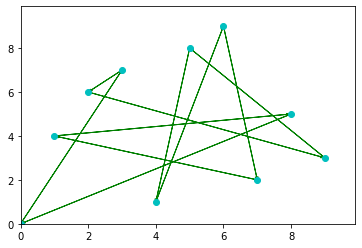

[6, 7, 1, 8, 0, 3, 2, 9, 5, 4]
[9, 2, 4, 5, 0, 7, 6, 3, 8, 1]


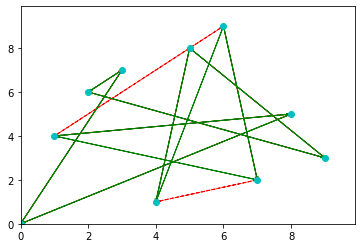

In [82]:
def plotTSP(path, points, num_iters=1):

    """
    path: List of lists with the different orders in which the nodes are visited
    points: coordinates for the different nodes
    num_iters: number of paths that are in the path list
    
    """

    # Unpack the primary TSP path and transform it into a list of ordered 
    # coordinates

    x = []; y = []
    for i in paths[0]:
        x.append(points[i][0])
        y.append(points[i][1])
    
    print(x)
    print(y)
    plt.plot(x, y, 'co')

    # Set a scale for the arrow heads
    a_scale = float(max(x))/float(100)

    # Draw the older paths, if provided
    if num_iters > 1:

        for i in range(1, num_iters):

            # Transform the old paths into a list of coordinates
            xi = []; yi = [];
            for j in paths[i]:
                xi.append(points[j][0])
                yi.append(points[j][1])

            plt.arrow(xi[-1], yi[-1], (xi[0] - xi[-1]), (yi[0] - yi[-1]), 
                    head_width = a_scale, color = 'r', 
                    length_includes_head = True, ls = 'dashed',
                    width = 0.001/float(num_iters))
            for i in range(0, len(x) - 1):
                plt.arrow(xi[i], yi[i], (xi[i+1] - xi[i]), (yi[i+1] - yi[i]),
                        head_width = a_scale, color = 'r', length_includes_head = True,
                        ls = 'dashed', width = 0.001/float(num_iters))

    # Draw the primary path for the TSP problem
    plt.arrow(x[-1], y[-1], (x[0] - x[-1]), (y[0] - y[-1]), head_width = a_scale, 
            color ='g', length_includes_head=True)
    for i in range(0,len(x)-1):
        plt.arrow(x[i], y[i], (x[i+1] - x[i]), (y[i+1] - y[i]), head_width = a_scale,
                color = 'g', length_includes_head = True)

    #Set axis too slitghtly larger than the set of x and y
    plt.xlim(0, max(x)*1.1)
    plt.ylim(0, max(y)*1.1)
    plt.show()


# Create a randomn list of coordinates, pack them into a list
# x_cor = [1, 8, 4, 9, 2, 1, 8]
x_cor = list(g1.nodes)
random.shuffle(x_cor)
#y_cor = [1, 2, 3, 4, 9, 5, 7]
y_cor = list(g1.nodes)
random.shuffle(y_cor)
points = []
for i in range(0, len(x_cor)):
    points.append((x_cor[i], y_cor[i]))
    
# Create two paths, teh second with two values swapped to simulate a 2-OPT
# Local Search operation
paths = ac1.allpaths

# Pack the paths into a list
#paths = [path1, path2, path3, path4]
#print(paths)

# Run the function
plotTSP(paths, points, 1)
plotTSP(paths, points, 2)

# References

* Ve4cib (2006) *Exhaustive Search* [online] Available at: <https://algorithmist.com/wiki/Exhaustive_search> Accessed on [April 1. 2020]
* Yang J, et al. (2008) *An ant colony optimization method for generalized TSP problem* [online] Available at: <https://www.sciencedirect.com/science/article/pii/S1002007108002736>.  Accessed on [March 22. 2020]
* Makura, Wiktor k., (n.d.) *Ant Colony Algorithm* [online] Available at: <https://mathworld.wolfram.com/AntColonyAlgorithm.html> [Accessed on Mar 22. 2020]
* Panigrahi D., (2015) *Design and Analysis of Algorithms* [online] Available at: <www2.cs.duke.edu/courses/fall15/compsci532/scribe_notes/lec14.pdf> [Accessed on Mar 18. 2020]
* Brownlee J., (2015) *Clever Algorithms: Nature-Inspired Programming Recipes* [online] Available at: <http://www.cleveralgorithms.com/nature-inspired/stochastic/tabu_search.html> [Accessed on Mar 18. 2020]